## HYPOTHESES TESTING

## IMPORTING MAJOR LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

## TWO SAMPLE T TEST

In [8]:
df = pd.read_csv(r"C:\module6\waze_dataset.csv")

In [10]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


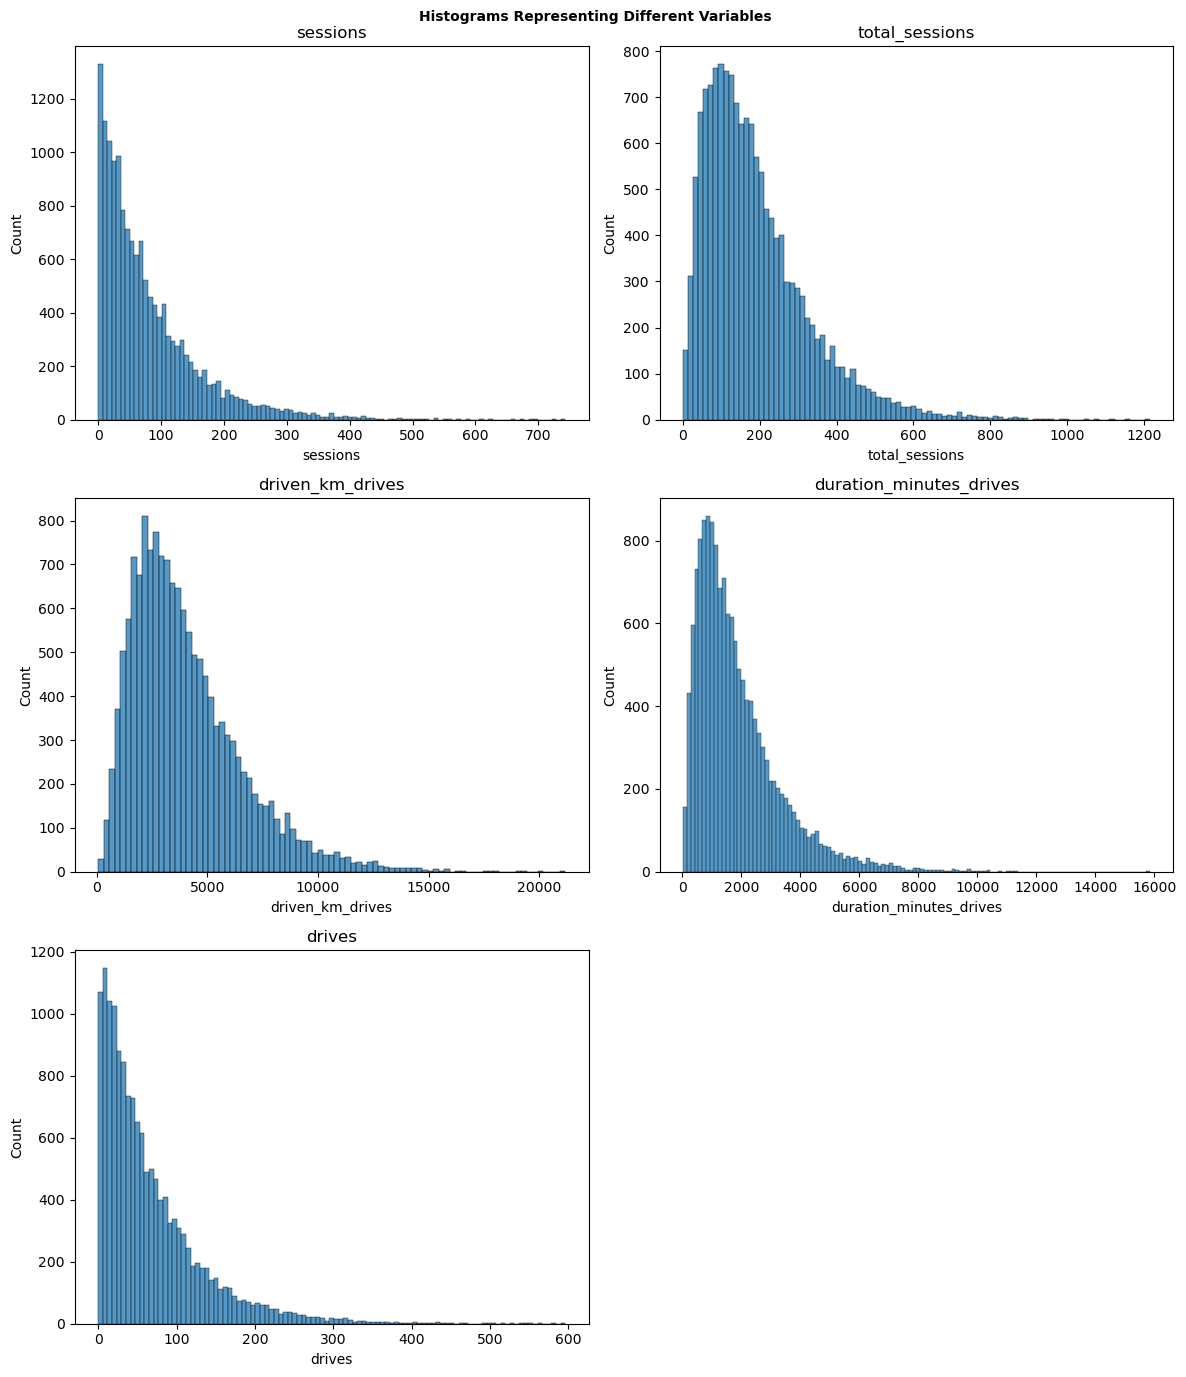

In [16]:
variables = ['sessions', 'total_sessions', 'driven_km_drives','duration_minutes_drives', 'drives']
fig, axs = plt.subplots(len(variables)//2 + 1, 2, figsize = (12, 14))
fig.suptitle('Histograms Representing Different Variables', size = 10, weight = 'bold')
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    sns.histplot(df[var], ax = ax)
    ax.set_title(var)

for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [18]:
map_dictionary = {'iPhone': 1, 'Android': 2}
df['device_type'] = df['device']
df['device_type'] = df['device_type'].map(map_dictionary)
df[['device', 'device_type']]

,device,device_type
0,Android,2
1,iPhone,1
2,Android,2
3,iPhone,1
4,Android,2
...,...,...
14994,iPhone,1
14995,Android,2
14996,iPhone,1
14997,iPhone,1


In [20]:
iphone_drives = df[df['device_type'] == 1 ] ['drives']
android_drives = df[df['device_type'] == 2 ] ['drives']

In [22]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

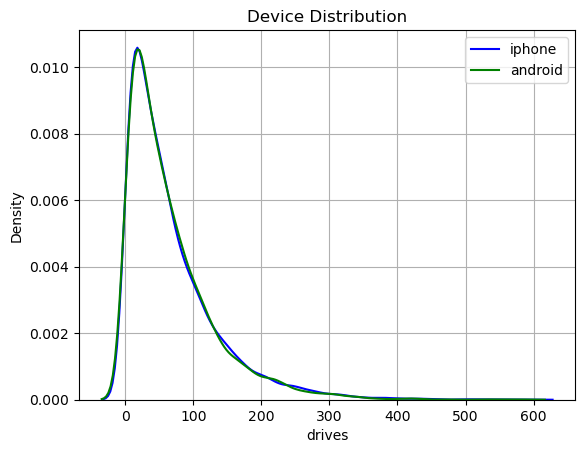

In [30]:
sns.kdeplot(iphone_drives, color = 'blue')
sns.kdeplot(android_drives, color = 'green')
plt.grid()
plt.legend(['iphone', 'android'])
plt.title('Device Distribution')
plt.show()

In [34]:
stats.ttest_ind(a = iphone_drives, b = android_drives, equal_var = False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

## CHI SQUARE TEST OF INDEPENDENCE

In [45]:
contingency_driving_days = pd.crosstab(df['device'],df['driving_days'])

chi2, p_values, dof, expected = chi2_contingency(contingency_driving_days)

print(chi2)
print(p_values)

42.329939265329415
0.06704544040759919


In [47]:
pd.set_option('display.max_columns', None)
contingency_driving_days

driving_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
device,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Android,343,187,221,193,167,198,207,194,207,211,190,210,200,224,204,175,214,215,225,216,208,183,174,123,141,118,81,48,28,15,7
iPhone,681,361,356,390,328,363,363,340,367,344,406,367,335,333,376,345,384,400,376,392,360,325,310,284,224,172,148,121,83,33,5


In [57]:
contingency_activity_days = pd.crosstab(df['device'],df['activity_days'])

chi2, p_values, dof, expected = chi2_contingency(contingency_activity_days)

print(chi2)
print(p_values)

23.91099439425829
0.8141596547131362


In [51]:
contingency_activity_days

activity_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
device,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Android,81,177,182,159,155,179,187,159,167,150,170,172,168,180,148,166,182,205,166,168,163,190,155,169,166,174,185,170,195,180,164,95
iPhone,162,333,309,315,306,327,296,334,319,308,322,297,289,293,301,307,298,341,318,297,311,335,314,287,333,304,288,290,327,345,315,151


In [59]:
contingency_label_days = pd.crosstab(df['device'],df['label'])

chi2, p_values, dof, expected = chi2_contingency(contingency_label_days)

print(chi2)
print(p_values)

0.14772271238945212
0.7007211845963164


In [61]:
contingency_label_days

label,churned,retained
device,,
Android,891,4183
iPhone,1645,7580
